Введите 6 элементов Кеплера:
1) Большая полуось (км): 70000
2) Эксцентриситет: 0.5
3) Наклон (в градусах): 63.5
4) Долгота восходящего угла (в градусах): 270
5) Аргумент перицентра (в градусах): 0
6) Начальная аномалия (в градусах): 0


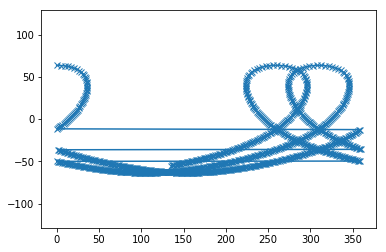

In [10]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
%matplotlib inline

def ex(z):
    E = z
    m = -t0 - t + ((((a*1000)**3)/(mu))**(1/2))*(E - (e*math.sin(E)))
    return m
# создает марицу поворота относительно вектора
def getPovMatrix(vec, fi): 
    x = vec[0]
    y = vec[1]
    z = vec[2]
    m = np.zeros((3,3))
    m[0][0] = math.cos(fi) + ((1-math.cos(fi))*(x**2))
    m[0][1] = ((1-math.cos(fi))*x*y)-((math.sin(fi))*z)
    m[0][2] = ((1-math.cos(fi))*x*z) + ((math.sin(fi))*y)
    m[1][0] = ((1-math.cos(fi))*y*x) + ((math.sin(fi))*z)
    m[1][1] = (math.cos(fi)) + ((1-math.cos(fi))*(y**2))
    m[1][2] = ((1 - math.cos(fi))*y*z) - ((math.sin(fi))*x)
    m[2][0] = ((1 - math.cos(fi))*z*x) - ((math.sin(fi))*y)
    m[2][1] = ((1-math.cos(fi))*z*y) + ((math.sin(fi))*x)
    m[2][2] = (math.cos(fi)) + ((1-math.cos(fi))*(z**2))
    return m

#создает вектор из координат
def createVec(x,y,z):
    v = np.zeros((3,1))
    v[0][0] = x
    v[1][0] = y
    v[2][0] = z
    return v


# body
# ввод данных

print ("Введите 6 элементов Кеплера:")
while True:
    print ("1) Большая полуось (км): ", end = "")
    a = float(input())
    if a>0:
        break
        
while True:
    print ("2) Эксцентриситет: ", end = "")
    e = float(input())
    if e>=0 and e<1:
        break
print ("3) Наклон (в градусах): ", end = "")
i = (float(input())%360)/180*math.pi
print ("4) Долгота восходящего угла (в градусах): ", end = "")
d = ((float(input())%360)/180*math.pi)
print ("5) Аргумент перицентра (в градусах): ", end = "")
w = (float(input())%360)/180*math.pi
print ("6) Начальная аномалия (в градусах): ", end = "")
M = (((float(input())%360)/180)*math.pi)
mu = 398603*(10**9)
E = 2 * (math.atan((math.tan(M/2))/(((1+e)/(1-e))**(1/2))))

# находим время которое понадобилось бы спутнику добраться до начальной аномалии
t0 = ((((a*1000)**3)/(mu))**(1/2))*(E - math.sin(E))
tList = np.linspace(0, 5*86165, 1000)

# вычисление позиции в двумерном пространстве
f = float(a*e) # расстояние от центра эллипса до точки фокуса
b = math.sqrt(a*a - f*f) # величина малой полуоси
shirotaList = []
dolgotaList = []
# xList = []
# yList = []
for t in tList: 
    ugolVrash = ((2*math.pi)/(86165))*t
    E = fsolve(ex, M)
    E = E%(2*math.pi)
    x = (a*math.cos(E)) - f
    y = ((((a**2)*(b**2))-((b**2)*((x+f)**2)))/(a**2))**(1/2)
    if E > math.pi:
        y = (-1)* y
    z = 0 

    vec = createVec(x,y,z)
   
    #создание вектора нормали к плоскости
    x = 0
    y = 0
    z = 1
    normalVec = createVec(x,y,z)
    OZvec = createVec(x,y,z)

    #создание вектора на восходящий узел
    x = math.cos(d)
    y = math.sin(d)
    z = 0
    vUzel = createVec(x,y,z)

    # наклон плокости на (i)
    m = getPovMatrix(vUzel, i)
    vec = m.dot(vec)
    normalVec = m.dot(normalVec)

    # поворот на аргумент перицентра
    m = getPovMatrix(normalVec, w)
    vec = m.dot(vec)
    
    # учет поворота Земли
    m = getPovMatrix(OZvec, -ugolVrash)
    vec = m.dot(vec)
    x,y,z = vec
    dolgota = math.acos((x)/((x**2+y**2)**(1/2)))
    if y<0:
        dolgota = math.pi+ (math.pi - dolgota)
    dolgota = (dolgota*180)/(math.pi)
    XYvec = createVec(x,y,0)
    shirota = ((math.acos((x**2+y**2)/(((x**2+y**2+z**2)*(x**2+y**2))**(1/2))))/math.pi)*180
    if z<0:
        shirota = -shirota
    
    shirotaList.append(shirota)
    dolgotaList.append(dolgota)
#     xList.append(vec[0])
#     yList.append(vec[1])
#вывод
plt.axis('equal')
plt.plot(dolgotaList,shirotaList,marker = "x")
# print ("Спутник находится в точке: ({},{},{})".format(x,y,z))

# print ("Долгота равна: {} градусов".format(dolgota))
# print("Широта равна: {} градусов".format(shirota))
# a ГСО = 35786 (42164.2)  t = 86164 (43082) - - - 